## Importing 

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression as lgi
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report

## Reading file 

In [12]:
dataSet_Address = r"D:\Payam\UT\Machin Learning\MyCode\UT_Project\quality_test.csv"
df = pd.read_csv(dataSet_Address)
df.head()

,test_1,test_2,Result
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


## Cleaning dataSet

In [13]:
print(df['test_1'].value_counts())
print(df['test_2'].value_counts())


-0.138820    2
 0.673390    2
-0.173390    2
-0.046659    2
-0.697580    2
            ..
 0.062788    1
-0.063940    1
-0.300120    1
-0.363480    1
 0.632650    1
Name: test_1, Length: 102, dtype: int64
 0.779970    3
-0.184940    3
-0.579680    3
 0.699560    2
-0.214180    2
            ..
-0.228800    1
-0.163010    1
 0.027047    1
 0.472950    1
-0.030612    1
Name: test_2, Length: 92, dtype: int64


## Pre-processing 

Mean of test 1 : 0.054778908474576275 
Mean of test 2 : 0.18310155932203387


array([[<Axes: title={'center': 'test_1'}>,
        <Axes: title={'center': 'test_2'}>],
       [<Axes: title={'center': 'Result'}>, <Axes: >]], dtype=object)

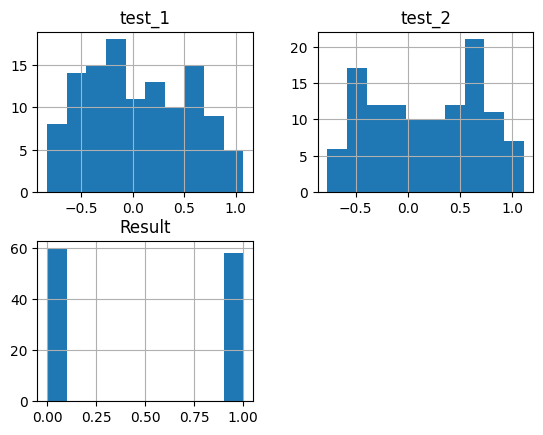

In [14]:
print("Mean of test 1 :" , df['test_1'].mean() , "\nMean of test 2 :",df['test_2'].mean())
df.hist()

### Splitting data to x and y data .

In [15]:
x_data = df[['test_1' , 'test_2']].values
y_data = df['Result'].values
print(x_data)
print(y_data)

[[ 0.051267   0.69956  ]
 [-0.092742   0.68494  ]
 [-0.21371    0.69225  ]
 [-0.375      0.50219  ]
 [-0.51325    0.46564  ]
 [-0.52477    0.2098   ]
 [-0.39804    0.034357 ]
 [-0.30588   -0.19225  ]
 [ 0.016705  -0.40424  ]
 [ 0.13191   -0.51389  ]
 [ 0.38537   -0.56506  ]
 [ 0.52938   -0.5212   ]
 [ 0.63882   -0.24342  ]
 [ 0.73675   -0.18494  ]
 [ 0.54666    0.48757  ]
 [ 0.322      0.5826   ]
 [ 0.16647    0.53874  ]
 [-0.046659   0.81652  ]
 [-0.17339    0.69956  ]
 [-0.47869    0.63377  ]
 [-0.60541    0.59722  ]
 [-0.62846    0.33406  ]
 [-0.59389    0.005117 ]
 [-0.42108   -0.27266  ]
 [-0.11578   -0.39693  ]
 [ 0.20104   -0.60161  ]
 [ 0.46601   -0.53582  ]
 [ 0.67339   -0.53582  ]
 [-0.13882    0.54605  ]
 [-0.29435    0.77997  ]
 [-0.26555    0.96272  ]
 [-0.16187    0.8019   ]
 [-0.17339    0.64839  ]
 [-0.28283    0.47295  ]
 [-0.36348    0.31213  ]
 [-0.30012    0.027047 ]
 [-0.23675   -0.21418  ]
 [-0.06394   -0.18494  ]
 [ 0.062788  -0.16301  ]
 [ 0.22984   -0.41155  ]


## Normalization

In [16]:
x_data = MinMaxScaler().fit(x_data).transform(x_data)


### Splitting to train and test data

In [17]:
x_train , x_test , y_train , y_test = train_test_split(x_data , y_data , random_state=4 , test_size=0.3)

### Modelling logistic-Regression

In [18]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train , y_train)
yhat = LR.predict(x_test)
yhat_proba = LR.predict_proba(x_test)
print(jaccard_score(y_test, yhat,pos_label=0))
print(np.mean((yhat - y_test)**2))


0.4722222222222222
0.5277777777777778


## modelling

In [42]:
k=[0.01 , 1 , 1000]
poly = PolynomialFeatures(degree=7)
train_poly = poly.fit_transform(x_train , y_train)
test_poly = poly.fit_transform(x_test,y_test)
for n in k :
    logistic_reg = lgi(penalty="l2" , C=n)
    poly_reg = logistic_reg.fit(train_poly , y_train.ravel())
    y_pred = poly_reg.predict(test_poly)
    a = classification_report(y_test,y_pred)
    print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

           0       0.47      1.00      0.64        17
           1       0.00      0.00      0.00        19

    accuracy                           0.47        36
   macro avg       0.24      0.50      0.32        36
weighted avg       0.22      0.47      0.30        36

              precision    recall  f1-score   support

           0       0.71      0.59      0.65        17
           1       0.68      0.79      0.73        19

    accuracy                           0.69        36
   macro avg       0.70      0.69      0.69        36
weighted avg       0.70      0.69      0.69        36

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.85      0.89      0.87        19

    accuracy                           0.86        36
   macro avg       0.86      0.86      0.86        36
weighted avg       0.86      0.86      0.86        36



c:\Users\payam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\payam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\payam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [44]:
print(type(a))

<class 'str'>
